<a href="https://colab.research.google.com/github/DhvaniVora25/Spambase-UCI-Classifier/blob/master/spambase_uci_classifier_with_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

#spambase data from UCI has been stored in google drive

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('spambase.data')

In [4]:
print("Percentage of spams in the data: ")
df['class'].value_counts()*100/df['class'].count()

Percentage of spams in the data: 


0    60.595523
1    39.404477
Name: class, dtype: float64

In [5]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [0]:
y = df["class"]
X = df.drop('class', axis=1)

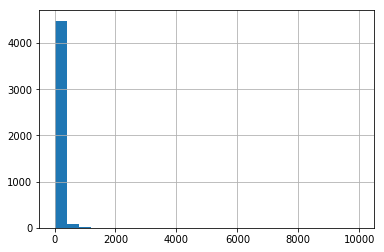

In [7]:
"""
Understanding the capital runs attributes in the data set, 
whose upper bound is not given
"""
X.capital_run_length_longest.hist(bins=25)


# Logistic Regression with normalization and cross validation

Creating the confusion matrix storing mechanism for every cross fold

In [0]:
from sklearn.metrics import confusion_matrix, make_scorer
import numpy as np

"""
The Scikit-learn confusion matrix: 

true negative : 0 classified as 0
false positive : 0 classified as 1
false negative : 1 classified as 0
true positive : 1 classified as 1

in our case, 
false positive: non spam classified as spam / non spam testing examples (0 classified as 1/class=0) 
                = fp / tn + fp
false negative: spam classified as non spam / spam testing examples (1 classified as 0/class=1)
                = fn / fn + tp
overall error rate: overall misclassified examples / all examples (0 classified as 1 and 1 classified as 0/ num of examples)
                = fp + fn / (tp + fp + fn + tn)
"""

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0,0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0,1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1,0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1,1]

def fpf(y_true, y_pred): return fp(y_true, y_pred) / (tn(y_true, y_pred) + fp(y_true, y_pred))
def fnf(y_true, y_pred): return fn(y_true, y_pred) / (fn(y_true, y_pred) + tp(y_true, y_pred))
def oer(y_true, y_pred): return (fp(y_true, y_pred) + fn(y_true, y_pred) )/( tn(y_true, y_pred) + fp(y_true, y_pred) + fn(y_true, y_pred) + tp(y_true, y_pred))

scoring = {
    'tp':make_scorer(tp),
    'tn':make_scorer(tn),
    'fp':make_scorer(fp),
    'fn':make_scorer(fn)
}

score = {
    'fp':make_scorer(fpf),
    'fn':make_scorer(fnf),
    'oe':make_scorer(oer)
}

In [0]:
from sklearn.model_selection import cross_validate

def results(estimator, X, y, k):
  scores = cross_validate(estimator=estimator,X=normalized_X,scoring=score, y=y, cv = k)

  table = []

  for i in range(k):
    m = [scores['test_fp'][i], scores['test_fn'][i], scores['test_oe'][i]]
    table.append(m)


  avg = np.sum(np.array(table), axis = 0, keepdims=True)/k


  matrix = pd.DataFrame(table, columns = ['False Positives','False Negatives','Overall Error'])
  print("Errors for each cross fold: ")
  print(matrix)
  print("\nAverage errors across all folds:\n")
  print("False Positives: {}\nFalse Negatives: {}\nOverall Error Rate: {}\n".format(avg[0][0],avg[0][1],avg[0][2]))
  
  return matrix, avg

Normalizing the data set and applying logistic regression and AdaBoost on the dataset, with confusion matrix as the scoring mechanism

In [18]:
from sklearn.linear_model import LogisticRegression

k = 5
normalized_X=(X-X.min())/(X.max()-X.min())

clf = LogisticRegression(random_state=1,multi_class='ovr', solver='lbfgs')


print("Logistic Regression: \n")
_, _ = results(clf, normalized_X, y, k)

Logistic Regression: 

Errors for each cross fold: 
   False Positives  False Negatives  Overall Error
0         0.037634         0.245179       0.119435
1         0.064516         0.203857       0.119435
2         0.059140         0.159780       0.098806
3         0.023339         0.176796       0.083787
4         0.192101         0.223757       0.204570

Average errors across all folds:

False Positives: 0.07534603579081485
False Negatives: 0.2018735826370181
Overall Error Rate: 0.12520666966761537



In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=200)
print("AdaBoost: \n")
_, _ = results(bdt, normalized_X, y, k)

AdaBoost: 

Errors for each cross fold: 
   False Positives  False Negatives  Overall Error
0         0.043011         0.090909       0.061889
1         0.032258         0.090909       0.055375
2         0.051971         0.052342       0.052117
3         0.028725         0.077348       0.047878
4         0.236984         0.160221       0.206746

Average errors across all folds:

False Positives: 0.0785898599126143
False Negatives: 0.09434576807756115
Overall Error Rate: 0.08480113988792519



#### Other classifying algorithms that I have tried are in the second Jupyter Notebook in the repository